### Data exploration and preprocessing

Result should be life_expectancy_cleaned.csv file ready to use for creating model.

TODO:
- Remove whitespaces from keys
- Remove rows without life expectancy
- Hash Country and change Status to category
- Take care of missing values

In [25]:
import pandas as pd

df_expectancy = pd.read_csv('life_expactancy_data.csv')
df_expectancy.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
896,Ethiopia,2001,Developing,52.5,372.0,246,0.85,1.186228,NaN,2366,...,55.0,4.26,32.0,4.9,12.178928,68492257.0,11.8,11.7,0.283,4.3
2705,Turkmenistan,2007,Developing,64.1,241.0,6,2.58,0.358651,98.0,59,...,98.0,2.16,98.0,0.1,26.371428,487137.0,3.3,3.3,0.000,10.4
1244,Iraq,2005,Developing,66.8,29.0,31,0.18,59.188452,65.0,908,...,69.0,4.13,65.0,0.1,1849.639110,278426.0,5.4,5.2,0.628,10.1
2570,Thailand,2014,Developing,74.6,152.0,8,6.41,789.077295,99.0,0,...,99.0,4.12,99.0,0.1,5941.847100,68416772.0,7.8,7.8,0.737,13.6
980,Georgia,2013,Developing,74.5,128.0,1,5.91,180.378703,96.0,7872,...,94.0,7.25,93.0,0.1,4274.376857,3776.0,2.7,2.8,0.755,13.5
1881,Niger,2011,Developing,59.4,241.0,50,0.15,32.224934,75.0,771,...,4.0,6.66,75.0,0.7,375.581987,1764636.0,1.5,1.3,0.323,4.8
1833,Netherlands,2011,Developed,81.1,63.0,1,8.96,1047.370244,2.0,51,...,97.0,1.53,97.0,0.1,5354.653600,1669374.0,1.0,0.9,0.911,17.2
2456,Sri Lanka,2000,Developing,71.5,175.0,5,1.45,60.490981,NaN,16527,...,99.0,3.77,99.0,0.1,875.412178,18655.0,15.3,15.5,0.677,12.4
289,Bhutan,2014,Developing,69.4,216.0,0,0.01,209.392134,99.0,0,...,98.0,3.57,99.0,0.5,2522.796800,776448.0,15.7,16.2,0.596,12.5
2128,Romania,2006,Developed,72.5,157.0,3,8.51,665.642755,99.0,3196,...,97.0,5.60,97.0,0.1,5828.745662,2119376.0,3.2,3.7,0.755,13.7


In [26]:
df_expectancy.info()
df_expectancy.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [27]:
# remove whitespaces from keys

df_expectancy = df_expectancy.rename(columns={'Life expectancy ' : 'Life expectancy', 'Measles ' : 'Measles', ' BMI ' : 'BMI',
                                              'under-five deaths ' : 'under-five deaths','Diphtheria ' : 'Diphtheria',
                                              ' thinness  1-19 years' : 'thinness  1-19 years', ' thinness 5-9 years' : 'thinness 5-9 years',
                                              ' HIV/AIDS' : 'HIV/AIDS'})

df_expectancy.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [28]:
# checking for NaN values
for column in df_expectancy.keys():
    print(column, df_expectancy[column].isnull().sum())

Country 0
Year 0
Status 0
Life expectancy 10
Adult Mortality 10
infant deaths 0
Alcohol 194
percentage expenditure 0
Hepatitis B 553
Measles 0
BMI 34
under-five deaths 0
Polio 19
Total expenditure 226
Diphtheria 19
HIV/AIDS 0
GDP 448
Population 652
thinness  1-19 years 34
thinness 5-9 years 34
Income composition of resources 167
Schooling 163


In [29]:
# drop rows without life expectancy

df_expectancy = df_expectancy.dropna(subset = ['Life expectancy'])
df_expectancy['Life expectancy'].isnull().sum()

0

### Country problem
 - We could group them by region (EU, South America, Africa etc.)
 - We could give them numerical value to save the information - Let's go with this one
 - ???

In [30]:
df_expectancy['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_expectancy['Country'] = le.fit_transform(df_expectancy['Country'])

# not sure here how
df_oh = pd.get_dummies(df_expectancy[['Status']])
df_expectancy = pd.concat([df_expectancy, df_oh], axis=1)
df_expectancy = df_expectancy.drop(['Status'], axis=1)

df_expectancy.sample(10)

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
1258,78,2007,79.5,75.0,0,13.59,9797.552661,NaN,64,56.6,...,92.0,0.1,61388.174570,4398942.0,0.3,0.2,0.902,17.6,1,0
1637,102,2012,81.0,58.0,0,7.67,343.123395,93.0,0,68.4,...,99.0,0.1,2193.883600,419455.0,0.8,0.7,0.821,14.1,1,0
2051,127,2003,74.7,142.0,3,9.06,542.023500,97.0,48,54.5,...,99.0,0.1,5693.524160,382457.0,2.4,2.6,0.796,15.3,1,0
2486,154,2002,67.9,221.0,0,4.41,250.711237,NaN,0,49.0,...,73.0,1.6,2232.513244,48344.0,3.5,3.5,0.000,11.0,0,1
1350,84,2011,68.5,224.0,7,6.63,179.170133,99.0,127,49.9,...,99.0,0.1,11634.424220,165566.0,2.3,2.5,0.766,14.4,0,1
2115,131,2003,67.6,226.0,1,8.15,0.000000,99.0,87,47.6,...,98.0,0.1,NaN,NaN,3.3,3.5,NaN,NaN,0,1
557,33,2002,77.8,11.0,2,6.06,675.780844,NaN,0,55.4,...,97.0,0.1,4463.545867,15623635.0,1.0,1.0,0.768,13.9,0,1
938,58,2007,89.0,89.0,3,12.20,64.737149,42.0,39,58.6,...,98.0,0.1,416.583970,6416229.0,0.6,0.6,0.873,16.1,0,1
696,42,2008,77.0,16.0,0,13.25,0.000000,99.0,2,62.6,...,99.0,0.1,NaN,NaN,1.9,2.0,NaN,NaN,1,0
789,49,2012,75.5,127.0,7,3.92,41.880877,88.0,72,52.1,...,87.0,0.1,572.143130,15419666.0,1.3,1.2,0.717,13.3,0,1


In [32]:
for column in df_expectancy.keys():
    print(column, df_expectancy[column].isnull().sum())

Country 0
Year 0
Life expectancy 0
Adult Mortality 0
infant deaths 0
Alcohol 193
percentage expenditure 0
Hepatitis B 553
Measles 0
BMI 32
under-five deaths 0
Polio 19
Total expenditure 226
Diphtheria 19
HIV/AIDS 0
GDP 443
Population 644
thinness  1-19 years 32
thinness 5-9 years 32
Income composition of resources 160
Schooling 160
Status_Developed 0
Status_Developing 0


### Missing values incident
Let's compare correlation matrix of each of the methods with original dataset.
 - We could drop them, sure
 - Replace them with mean or similar value
 - Take advantage of their status and assign value to them with their status in mind

In [40]:
corr_matrix_orig = df_expectancy.corr()
corr_matrix_orig['Life expectancy'].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Status_Developed                   0.482136
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Country                           -0.017901
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.471584
thinness  1-19 years              -0.477183
Status_Developing                 -0.482136
HIV/AIDS                          -0.556556
Adult Mortality                 

array([[<AxesSubplot:xlabel='Life expectancy', ylabel='Life expectancy'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Life expectancy'>],
       [<AxesSubplot:xlabel='Life expectancy', ylabel='Adult Mortality'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Adult Mortality'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Adult Mortality'>],
       [<AxesSubplot:xlabel='Life expectancy', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Schooling'>]],
      dtype=object)

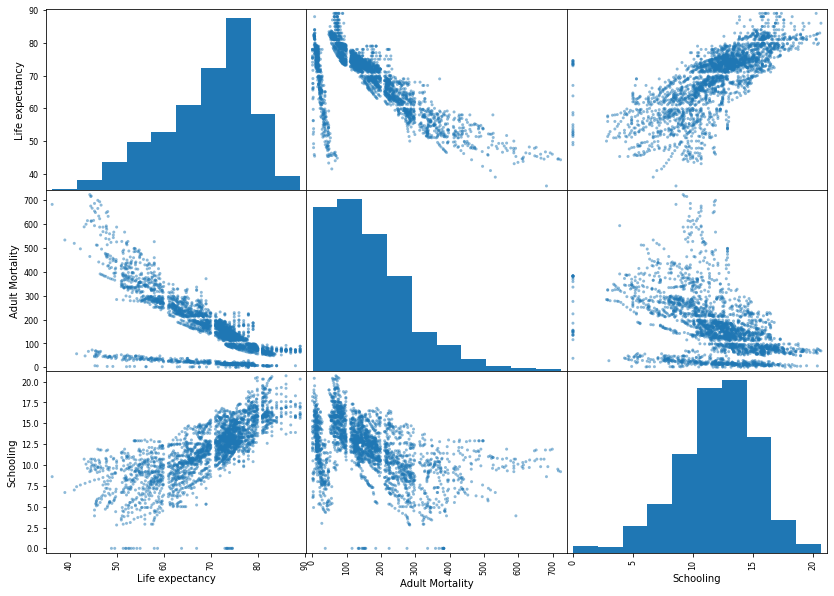

In [42]:
attributes = ['Life expectancy', 'Adult Mortality', 'Schooling']
pd.plotting.scatter_matrix(df_expectancy[attributes], figsize=(14, 10))

In [35]:
df_dropped = df_expectancy.dropna()
corr_matrix_dropped = df_dropped.corr()
corr_matrix_dropped['Life expectancy'].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
BMI                                0.542042
Status_Developed                   0.442798
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
Total expenditure                  0.174718
Year                               0.050771
Population                        -0.022305
Measles                           -0.068881
Country                           -0.115182
infant deaths                     -0.169074
under-five deaths                 -0.192265
Status_Developing                 -0.442798
thinness 5-9 years                -0.457508
thinness  1-19 years              -0.457838
HIV/AIDS                          -0.592236
Adult Mortality                 

array([[<AxesSubplot:xlabel='Life expectancy', ylabel='Life expectancy'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Life expectancy'>],
       [<AxesSubplot:xlabel='Life expectancy', ylabel='Adult Mortality'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Adult Mortality'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Adult Mortality'>],
       [<AxesSubplot:xlabel='Life expectancy', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Schooling'>]],
      dtype=object)

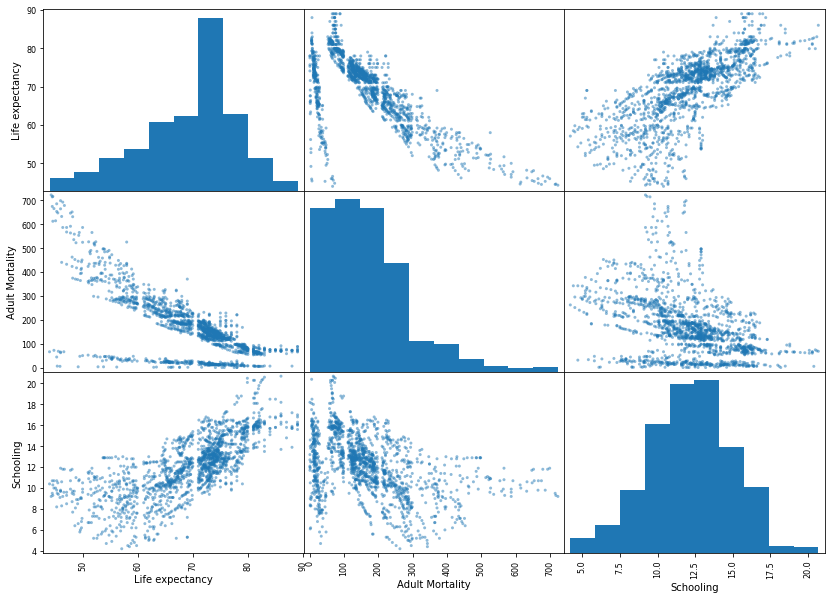

In [43]:
pd.plotting.scatter_matrix(df_dropped[attributes], figsize=(14, 10))

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
X = imputer.fit_transform(df_expectancy)
df_mean = pd.DataFrame(X, columns=df_expectancy.columns, index=df_expectancy.index)
corr_matrix_mean = df_mean.corr()
corr_matrix_mean['Life expectancy'].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.718614
Income composition of resources    0.692621
BMI                                0.562453
Status_Developed                   0.482136
Diphtheria                         0.476442
Polio                              0.462592
GDP                                0.430551
Alcohol                            0.392420
percentage expenditure             0.381864
Total expenditure                  0.209628
Hepatitis B                        0.204566
Year                               0.170033
Country                           -0.017901
Population                        -0.019629
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.467231
thinness  1-19 years              -0.472778
Status_Developing                 -0.482136
HIV/AIDS                          -0.556556
Adult Mortality                 

array([[<AxesSubplot:xlabel='Life expectancy', ylabel='Life expectancy'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Life expectancy'>],
       [<AxesSubplot:xlabel='Life expectancy', ylabel='Adult Mortality'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Adult Mortality'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Adult Mortality'>],
       [<AxesSubplot:xlabel='Life expectancy', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Schooling'>]],
      dtype=object)

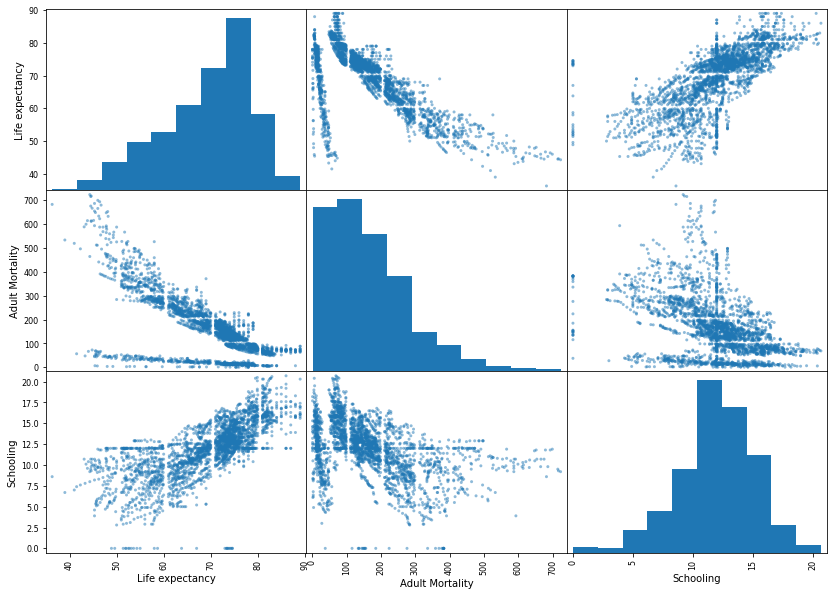

In [47]:
# actually seems kind of similar
pd.plotting.scatter_matrix(df_mean[attributes], figsize=(14, 10))

In [49]:
df_developed = df_expectancy[df_expectancy['Status_Developed'] == 1]
df_developing = df_expectancy[df_expectancy['Status_Developing'] == 1]

X_developed = imputer.fit_transform(df_developed)
X_developing = imputer.fit_transform(df_developing)

df_developed = pd.DataFrame(X_developed, columns=df_developed.columns, index=df_developed.index)
df_developing = pd.DataFrame(X_developing, columns=df_developing.columns, index=df_developing.index)

df_merged = df_developed.append(df_developing)
corr_matrix_merged = df_merged.corr()
corr_matrix_merged['Life expectancy'].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.735217
Income composition of resources    0.708915
BMI                                0.564304
Status_Developed                   0.482136
Diphtheria                         0.477065
Polio                              0.463225
GDP                                0.451944
Alcohol                            0.404881
percentage expenditure             0.381864
Hepatitis B                        0.231823
Total expenditure                  0.219833
Year                               0.170033
Country                           -0.017901
Population                        -0.023008
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.469397
thinness  1-19 years              -0.474954
Status_Developing                 -0.482136
HIV/AIDS                          -0.556556
Adult Mortality                 

array([[<AxesSubplot:xlabel='Life expectancy', ylabel='Life expectancy'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Life expectancy'>],
       [<AxesSubplot:xlabel='Life expectancy', ylabel='Adult Mortality'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Adult Mortality'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Adult Mortality'>],
       [<AxesSubplot:xlabel='Life expectancy', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Adult Mortality', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Schooling'>]],
      dtype=object)

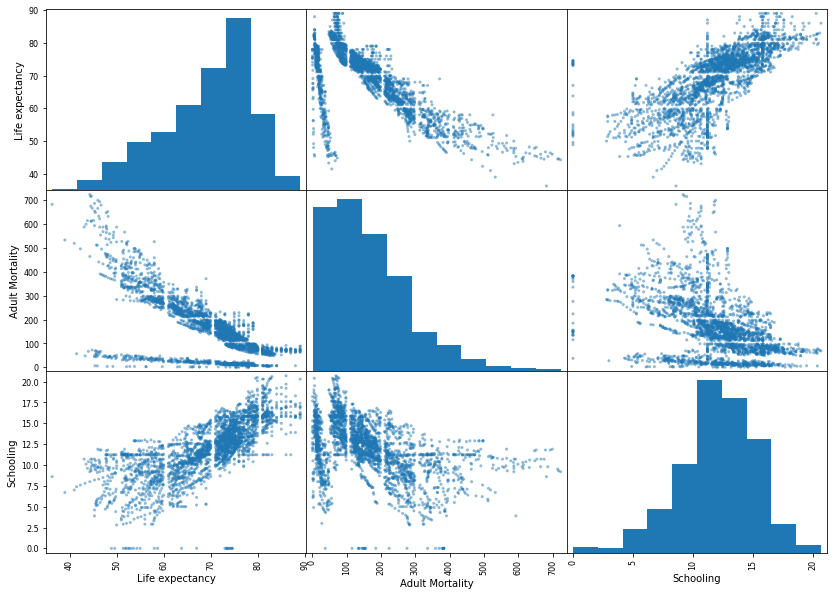

In [50]:
pd.plotting.scatter_matrix(df_merged[attributes], figsize=(14, 10))

In [53]:
df_dropped.info()
df_mean.info()
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   int64  
 1   Year                             1649 non-null   int64  
 2   Life expectancy                  1649 non-null   float64
 3   Adult Mortality                  1649 non-null   float64
 4   infant deaths                    1649 non-null   int64  
 5   Alcohol                          1649 non-null   float64
 6   percentage expenditure           1649 non-null   float64
 7   Hepatitis B                      1649 non-null   float64
 8   Measles                          1649 non-null   int64  
 9   BMI                              1649 non-null   float64
 10  under-five deaths                1649 non-null   int64  
 11  Polio                            1649 non-null   float64
 12  Total expenditure   

Each of three methods seems to outputted meaningful information, so let's continue with the df_mean, as we didn't lose any rows.

In [55]:
df_mean.to_csv('life_expectancy_cleaned.csv')